In [1]:
import matplotlib.pyplot as plt
import control as ctl
kp=0.6;kd=0.01;ki=0.03
sys=ctl.tf([kd,kp,5.235e005*ki],[,1,87.35+kd,1.047e004+kp,0+ki])
[yo,t]=ctl.step_response(sys)
plt.plot(t,yo)
plt.show

SyntaxError: invalid syntax (1465646135.py, line 4)

Text(0, 0.5, 'error')

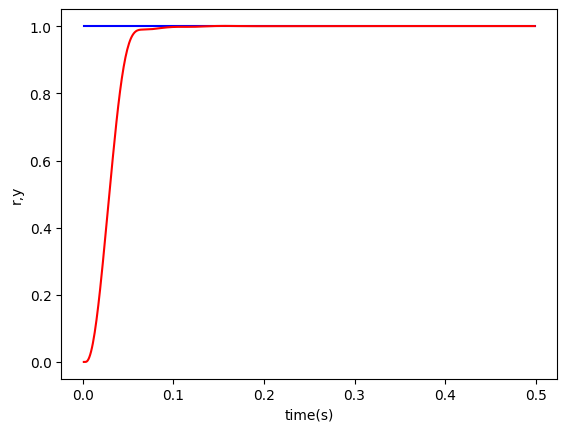

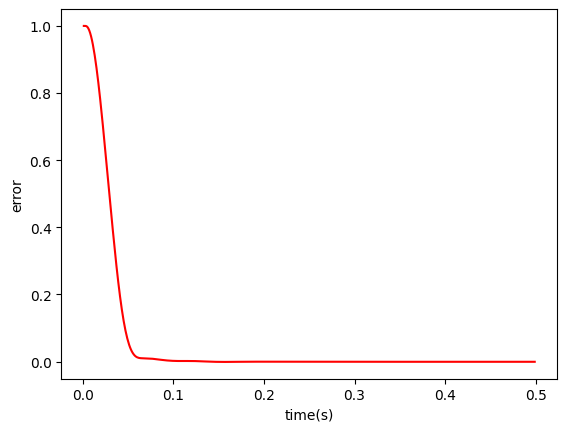

In [ ]:
import matplotlib.pyplot as plt
import control as ctl

#Expert PID Controller
ts=0.001
sys=ctl.tf(5.235e005,[1,87.35,1.047e004,0])  #Plant
dsys=ctl.c2d(sys,ts,'zoh')

[num,den]=ctl.tfdata(dsys)

u_1=0;u_2=0;u_3=0
y_1=0;y_2=0;y_3=0

x=[0,0,0]
## e(k) delta e(k) ∫e(k)
x2_1=0

kp=0.6
ki=0.03
kd=0.01

# kp=0.5
# ki=0.001
# kd=0.001

error_1=0

time=[];r=[];u=[];y=[];error=[];ry=[]

for k in range(1,500,1):
    time.append(k*ts)
    r.append(1.0)                    #Tracing Step Signal
    u.append(kp*x[0]+kd*x[1]+ki*x[2]) #PID Controller
    k=k-1   
    # Expert control rule
    if (abs(x[0])>0.8):      #Rule1:Unclosed control rule
        u[k]=0.45
    elif (abs(x[0])>0.40):        
        u[k]=0.40
    elif (abs(x[0])>0.20): 
        u[k]=0.12 
    elif (abs(x[0])>0.01):
        u[k]=0.10   

    if (x[0]*x[1]>0 or(x[1]==0)):     #Rule2
        if (abs(x[0])>=0.05):
            u[k]=u_1+2*kp*x[0]
        else:
            u[k]=u_1+0.4*kp*x[0]
                                                                                                                                                                                                                                                                                                                                                                                                         
    if ((x[0]*x[1]<0 and x[1]*x2_1>0)or(x[0]==0)):   #Rule3
        u[k]=u[k]

    if (x[0]*x[1]<0 and x[1]*x2_1<0):   #Rule4
        if (abs(x[0])>=0.05):
            u[k]=u_1+2*kp*error_1
        else:
            u[k]=u_1+0.6*kp*error_1

    if (abs(x[0])<=0.001):   #Rule5:Integration separation PI control
        u[k]=0.5*x[0]+0.010*x[2]

    #Restricting the output of controller
    if (u[k]>=10):
        u[k]=10
    if (u[k]<=-10):
        u[k]=-10

    #Linear model
    y.append(-den[0][0][1]*y_1-den[0][0][2]*y_2-den[0][0][3]*y_3+num[0][0][0]*u_1+num[0][0][1]*u_2+num[0][0][2]*u_3)#+num[0]*u[k]
    error.append(r[k]-y[k])

    #----------Return of parameters------------#
    u_3=u_2;u_2=u_1;u_1=u[k]
    y_3=y_2;y_2=y_1;y_1=y[k]
    
    x[0]=error[k]                # Calculating P
    x2_1=x[1]
    x[1]=(error[k]-error_1)/ts   # Calculating D
    x[2]=x[2]+error[k]*ts        # Calculating I

    error_1=error[k]
    ry.append(r[k]-y[k])


plt.figure(1)
plt.plot(time,r,'b',time,y,'r')
plt.xlabel('time(s)');plt.ylabel('r,y')
plt.figure(2)
plt.plot(time,ry,'r')
plt.xlabel('time(s)');plt.ylabel('error')

In [ ]:
den

[[array([ 1.        , -2.90633931,  2.82269562, -0.91635631])]]

In [ ]:
num

[[array([8.53331265e-05, 3.33831370e-04, 8.16859077e-05])]]